In [5]:
import pandas as pd
import torch
import matplotlib.pyplot as plt
from func import get_model, get_data_loaders, get_patient_loader

In [6]:
device = "cuda" if torch.cuda.is_available() else "mps" if torch.backends.mps.is_available() else "cpu"
batch_size = 64
data_dir = "./data/"
model = get_model()

MyNet(
  (pretrained): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequential(
         

In [30]:
def generate_results(model, device, criterion, data_dir, patient=None, gene = "RUBCNL"):
    model.eval()
    print("generating results...")
    print(data_dir, patient)
    loader = get_patient_loader(data_dir, patient=patient, gene=gene)
    filename = data_dir + patient + "/Preprocessed_STDataset/results.csv"
    print(filename)
    if os.path.exists(filename):
        os.remove(filename)
    columns = ['labels', 'output', 'path', 'tile']
    df = pd.DataFrame(columns=columns)
    df.to_csv(filename, index=False)
    print("generated results...")
    i = 0
    j = len(loader)
    with torch.no_grad():
        for images, labels, name in loader:
            if i%100 ==0:
                print(i, "/", j)
            i+=1
            images = images.unsqueeze(0).to(device)
            images = images.float()
            #labels = torch.stack(labels, dim=1)
            #labels = labels.float()
            labels = torch.tensor(labels[0]).to(device)
            
            output = model(images)
            output=output.squeeze().unsqueeze(0)
            labels=labels.unsqueeze(0)
            
            loss = criterion(output, labels).cpu()
            
            output = pd.DataFrame(output.cpu())
            labels = pd.DataFrame(labels.cpu())
            res = pd.concat([output, labels, pd.Series(name), pd.Series(os.path.basename(name))], axis=1)
            res.columns = columns
            
            res.to_csv(filename, index=False, mode='a', header=False)

In [31]:
import os
patients = [os.path.basename(f) for f in os.scandir(data_dir) if f.is_dir()]
print(patients)
for patient in patients:
    generate_results(model.to(device), device, torch.nn.CrossEntropyLoss(), data_dir, batch_size, patient, gene = "RUBCNL")

['p020', 'p016', 'p014', 'p013', 'p025', 'p007', 'p009']
generating results...
./data/ p020
./data/p020/Preprocessed_STDataset/results.csv
generated results...
0 / 4025


/Users/jona/Documents/uni/Master/master thesis/sync/xai_cc/func.py:267: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  train_st_dataset = pd.concat([train_st_dataset, st_dataset[columns_of_interest]])  # concat all samples


100 / 4025
200 / 4025
300 / 4025
400 / 4025
500 / 4025
600 / 4025
700 / 4025
800 / 4025
900 / 4025
1000 / 4025
1100 / 4025
1200 / 4025
1300 / 4025
1400 / 4025
1500 / 4025
1600 / 4025
1700 / 4025
1800 / 4025
1900 / 4025
2000 / 4025
2100 / 4025
2200 / 4025
2300 / 4025
2400 / 4025
2500 / 4025
2600 / 4025
2700 / 4025
2800 / 4025
2900 / 4025
3000 / 4025
3100 / 4025
3200 / 4025
3300 / 4025
3400 / 4025
3500 / 4025
3600 / 4025
3700 / 4025
3800 / 4025
3900 / 4025
4000 / 4025
generating results...
./data/ p016
./data/p016/Preprocessed_STDataset/results.csv
generated results...


/Users/jona/Documents/uni/Master/master thesis/sync/xai_cc/func.py:267: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  train_st_dataset = pd.concat([train_st_dataset, st_dataset[columns_of_interest]])  # concat all samples


0 / 6772
100 / 6772
200 / 6772
300 / 6772
400 / 6772
500 / 6772
600 / 6772
700 / 6772
800 / 6772
900 / 6772
1000 / 6772
1100 / 6772
1200 / 6772
1300 / 6772
1400 / 6772
1500 / 6772
1600 / 6772
1700 / 6772
1800 / 6772
1900 / 6772
2000 / 6772
2100 / 6772
2200 / 6772
2300 / 6772
2400 / 6772
2500 / 6772
2600 / 6772
2700 / 6772
2800 / 6772
2900 / 6772
3000 / 6772
3100 / 6772
3200 / 6772
3300 / 6772
3400 / 6772
3500 / 6772
3600 / 6772
3700 / 6772
3800 / 6772
3900 / 6772
4000 / 6772
4100 / 6772
4200 / 6772
4300 / 6772
4400 / 6772
4500 / 6772
4600 / 6772
4700 / 6772
4800 / 6772
4900 / 6772
5000 / 6772
5100 / 6772
5200 / 6772
5300 / 6772
5400 / 6772
5500 / 6772
5600 / 6772
5700 / 6772
5800 / 6772
5900 / 6772
6000 / 6772
6100 / 6772
6200 / 6772
6300 / 6772
6400 / 6772
6500 / 6772
6600 / 6772
6700 / 6772
generating results...
./data/ p014
./data/p014/Preprocessed_STDataset/results.csv
generated results...
0 / 5973


/Users/jona/Documents/uni/Master/master thesis/sync/xai_cc/func.py:267: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  train_st_dataset = pd.concat([train_st_dataset, st_dataset[columns_of_interest]])  # concat all samples


100 / 5973
200 / 5973
300 / 5973
400 / 5973
500 / 5973
600 / 5973
700 / 5973
800 / 5973
900 / 5973
1000 / 5973
1100 / 5973
1200 / 5973
1300 / 5973
1400 / 5973
1500 / 5973
1600 / 5973
1700 / 5973
1800 / 5973
1900 / 5973
2000 / 5973
2100 / 5973
2200 / 5973
2300 / 5973
2400 / 5973
2500 / 5973
2600 / 5973
2700 / 5973
2800 / 5973
2900 / 5973
3000 / 5973
3100 / 5973
3200 / 5973
3300 / 5973
3400 / 5973
3500 / 5973
3600 / 5973
3700 / 5973
3800 / 5973
3900 / 5973
4000 / 5973
4100 / 5973
4200 / 5973
4300 / 5973
4400 / 5973
4500 / 5973
4600 / 5973
4700 / 5973
4800 / 5973
4900 / 5973
5000 / 5973
5100 / 5973
5200 / 5973
5300 / 5973
5400 / 5973
5500 / 5973
5600 / 5973
5700 / 5973
5800 / 5973
5900 / 5973
generating results...
./data/ p013
./data/p013/Preprocessed_STDataset/results.csv
generated results...
0 / 920


/Users/jona/Documents/uni/Master/master thesis/sync/xai_cc/func.py:267: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  train_st_dataset = pd.concat([train_st_dataset, st_dataset[columns_of_interest]])  # concat all samples


100 / 920
200 / 920
300 / 920
400 / 920
500 / 920
600 / 920
700 / 920
800 / 920
900 / 920
generating results...
./data/ p025
./data/p025/Preprocessed_STDataset/results.csv
generated results...
0 / 4967


/Users/jona/Documents/uni/Master/master thesis/sync/xai_cc/func.py:267: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  train_st_dataset = pd.concat([train_st_dataset, st_dataset[columns_of_interest]])  # concat all samples


100 / 4967
200 / 4967
300 / 4967
400 / 4967
500 / 4967
600 / 4967
700 / 4967
800 / 4967
900 / 4967
1000 / 4967
1100 / 4967
1200 / 4967
1300 / 4967
1400 / 4967
1500 / 4967
1600 / 4967
1700 / 4967
1800 / 4967
1900 / 4967
2000 / 4967
2100 / 4967
2200 / 4967
2300 / 4967
2400 / 4967
2500 / 4967
2600 / 4967
2700 / 4967
2800 / 4967
2900 / 4967
3000 / 4967
3100 / 4967
3200 / 4967
3300 / 4967
3400 / 4967
3500 / 4967
3600 / 4967
3700 / 4967
3800 / 4967
3900 / 4967
4000 / 4967
4100 / 4967
4200 / 4967
4300 / 4967
4400 / 4967
4500 / 4967
4600 / 4967
4700 / 4967
4800 / 4967
4900 / 4967
generating results...
./data/ p007
./data/p007/Preprocessed_STDataset/results.csv
generated results...
0 / 4047


/Users/jona/Documents/uni/Master/master thesis/sync/xai_cc/func.py:267: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  train_st_dataset = pd.concat([train_st_dataset, st_dataset[columns_of_interest]])  # concat all samples


100 / 4047
200 / 4047
300 / 4047
400 / 4047
500 / 4047
600 / 4047
700 / 4047
800 / 4047
900 / 4047
1000 / 4047
1100 / 4047
1200 / 4047
1300 / 4047
1400 / 4047
1500 / 4047
1600 / 4047
1700 / 4047
1800 / 4047
1900 / 4047
2000 / 4047
2100 / 4047
2200 / 4047
2300 / 4047
2400 / 4047
2500 / 4047
2600 / 4047
2700 / 4047
2800 / 4047
2900 / 4047
3000 / 4047
3100 / 4047
3200 / 4047
3300 / 4047
3400 / 4047
3500 / 4047
3600 / 4047
3700 / 4047
3800 / 4047
3900 / 4047
4000 / 4047
generating results...
./data/ p009
./data/p009/Preprocessed_STDataset/results.csv
generated results...
0 / 2920


/Users/jona/Documents/uni/Master/master thesis/sync/xai_cc/func.py:267: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  train_st_dataset = pd.concat([train_st_dataset, st_dataset[columns_of_interest]])  # concat all samples


100 / 2920
200 / 2920
300 / 2920
400 / 2920
500 / 2920
600 / 2920
700 / 2920
800 / 2920
900 / 2920
1000 / 2920
1100 / 2920
1200 / 2920
1300 / 2920
1400 / 2920
1500 / 2920
1600 / 2920
1700 / 2920
1800 / 2920
1900 / 2920
2000 / 2920
2100 / 2920
2200 / 2920
2300 / 2920
2400 / 2920
2500 / 2920
2600 / 2920
2700 / 2920
2800 / 2920
2900 / 2920


In [ ]:
#------------------------------------------------------------------------------
def pearson_calc(test_df, true, preds, params):
  for j in range(len(true)):
    pearson_name = true[j].replace("true", "pearson")
    pearson_name = pearson_name + "_"+str(params[1])+"_"+params[2]+"_"+sample
    pearson = stats.pearsonr(test_df[true[j]], test_df[preds[j]])
    with open(test_log, "a") as f:
      f.write(pearson_name + ": " + ("%.4f" % pearson[0]))
      f.write("\n")
      f.write("-----------------------------------")
      f.write("\n")
    pearson_save_name = data_dir + date + "_ST_Predict_absolute_single_"+str(params[1])+"_" + params[2] +"_" + gene_list[0]+ params[0] + "pearson.pkl"
    with open(pearson_save_name, 'wb') as f: 
      pickle.dump([pearson], f)
#------------------------------------------------------------------------------

In [12]:
def calc_residuals(test_df, true, preds):
  for i in range(len(true)):
    test_df[true[i]] = test_df[true[i]].astype(float)
    test_df[preds[i]] = test_df[preds[i]].astype(float)
    res_name = true[i].replace("true", "residuals")
    res_abs_name = true[i].replace("true", "residuals_abs")
    test_df[res_name] = test_df[true[i]] - test_df[preds[i]]
    test_df[res_abs_name] = test_df[res_name].abs()
  return test_df

In [4]:
import os
data_dir = "./data/"
patients = [os.path.basename(f) for f in os.scandir(data_dir) if f.is_dir()]
print(patients)
for patient in patients:
    filename = data_dir + "/" + patient + "/Preprocessed_STDataset/spatial_data.csv"
    spatial_matrix = pd.read_csv(data_dir+patient+"/Preprocessed_STDataset/Raw_Spatial_Matrix_156_"+patient+".csv") #adapt to sample
    spatial_matrix['tile'] = spatial_matrix['tile'].apply(lambda x: "{}{}".format(x, ".tiff"))
    spatial_matrix['tile'] = spatial_matrix['tile'].apply(lambda x: "{}{}".format(data_dir+patient+"/Tiles_156/", x[57:])) #adapt to sample
    spatial_matrix['path'] = spatial_matrix['tile']
    spatial_matrix['tile'] = spatial_matrix['tile'].apply(lambda x: os.path.basename(x))
    spatial_matrix.to_csv(filename, index=False)

['p020', 'p016', 'p014', 'p013', 'p025', 'p007', 'p009']
./data//p020/Preprocessed_STDataset/spatial_data.csv
./data//p016/Preprocessed_STDataset/spatial_data.csv
./data//p014/Preprocessed_STDataset/spatial_data.csv
./data//p013/Preprocessed_STDataset/spatial_data.csv
./data//p025/Preprocessed_STDataset/spatial_data.csv
./data//p007/Preprocessed_STDataset/spatial_data.csv
./data//p009/Preprocessed_STDataset/spatial_data.csv


In [46]:
def merge_data(data_dir, patient):
    base_path = data_dir+patient+"/Preprocessed_STDataset/"
    spatial_matrix = pd.read_csv(base_path + "spatial_data.csv")
    results  = pd.read_csv(base_path + "results.csv")
    results = results.drop("path", axis=1)
#Merge spatial with test dataset to get spatial coordinates for predicted tiles
    merge = pd.merge(results, spatial_matrix, on = "tile")
    merge.set_index("tile", inplace=True)
    merge.to_csv(base_path + "merge.csv")
for patient in patients:
    merge_data(data_dir, patient)

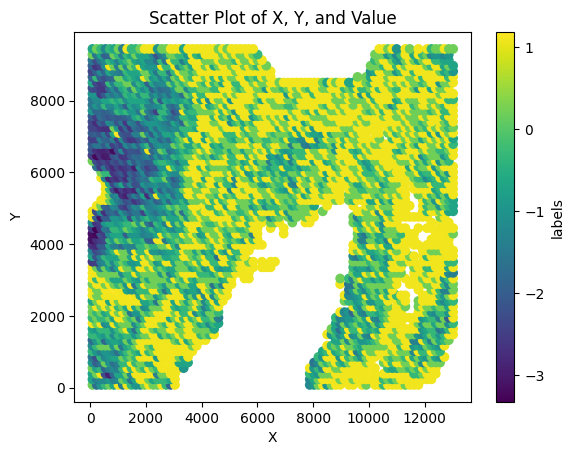

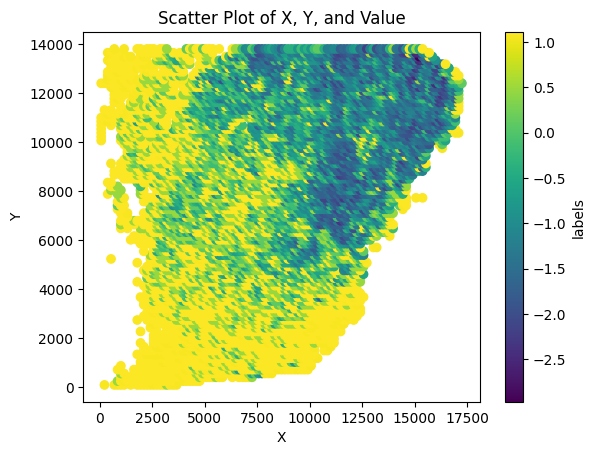

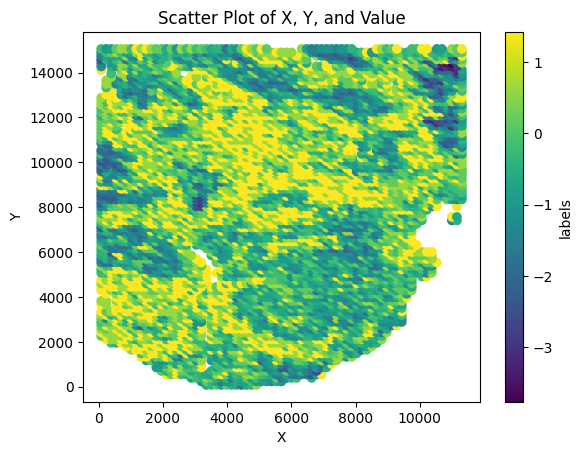

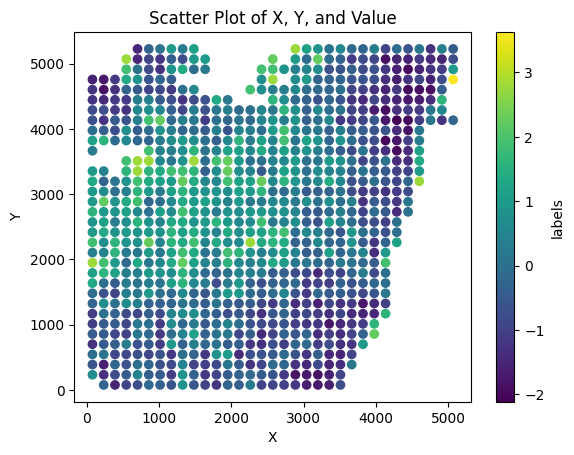

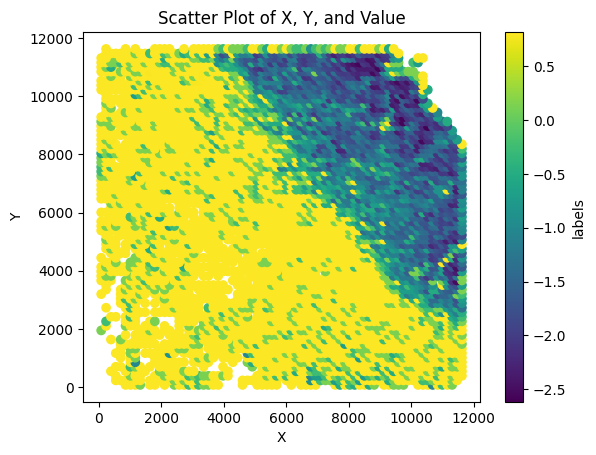

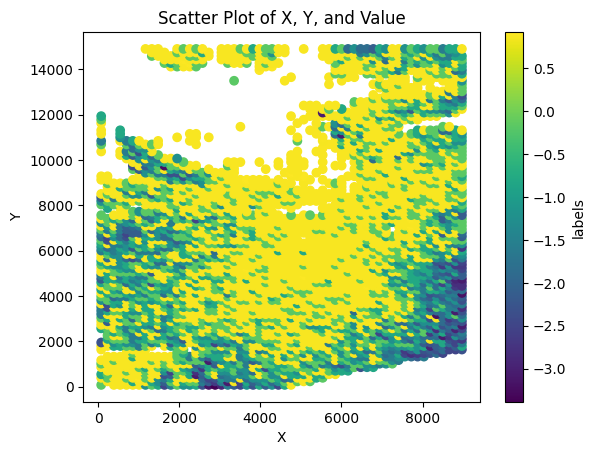

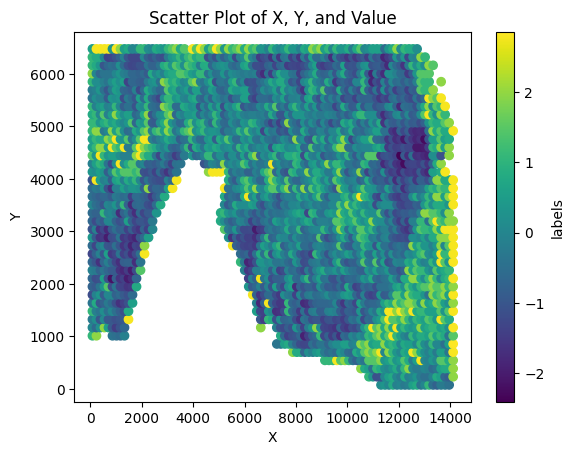

In [54]:
# function that combines all tiles back to the image
def plot_data(data_dir, patient):
    base_path = data_dir+patient+"/Preprocessed_STDataset/"
    merge = pd.read_csv(base_path + "merge.csv")
    merge["diff"] = merge["labels"] - merge["output"]
    merge.to_csv(base_path + "merge.csv")
    plt.scatter(merge['x'], merge['y'], c=merge['diff'], cmap='viridis')
    plt.colorbar(label='labels')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Scatter Plot of X, Y, and Value')
    plt.show()
    #merge.plot.scatter(x="x", y="y")
for patient in patients:
    plot_data(data_dir, patient)

In [43]:
#Get filtered spatial matrix
new_spatial = merge.copy()
new_spatial = new_spatial[["tile", "x", "y"]]
new_spatial.set_index("tile", inplace=True)
spatial_array = new_spatial.to_numpy()
    
#Get filtered gene matrix
new_gene = merge.copy()
new_gene.drop(columns=["x", "y"], inplace=True)
new_gene.set_index("tile", inplace=True)

#Load Image
Image.MAX_IMAGE_PIXELS = None
h_e_img = plt.imread("/fast/users/jole12_c/work/ST_Predict/Test_Data/"+sample+"/Preprocessed_STDataset/HE_norm_"+sample+".tif") #adapt to sample

#Setup anndata object
adata_test = AnnData(new_gene, obsm={"spatial": spatial_array})
adata_test.var
spatial_key = "spatial"
library_id = "tissue42"
adata_test.uns[spatial_key] = {library_id: {}}
adata_test.uns[spatial_key][library_id]["images"] = {}
adata_test.uns[spatial_key][library_id]["images"] = {"hires": h_e_img}
adata_test.uns[spatial_key][library_id]["scalefactors"] = {"tissue_hires_scalef": 1, "spot_diameter_fullres": 130}

#Save predicted anndata object
adata_test.write(data_dir + date + "_Test_"+gene_list[0]+"_" + params[0] + "_" + str(params[1]) + "_" + params[2] + "_" +sample+".h5ad") #adapt to sample

#Plot spatial gene truth and prediction
for l in range(len(true)):
    spatial_plot_name = data_dir+"/Figures/ST_Predict_absolute_single_"+str(params[1])+"_"+params[2]+"_"+gene_list[0]+params[0]+"_test_spatial_"+load_metric+"_"+sample+".tif" #adapt to sample
    sq.pl.spatial_scatter(adata_test, use_raw=False, shape="circle", color=[true[l], preds[l]], title=[true[l].replace("_true", "")+" - groundtruth", preds[l].replace("_prediction", "")+" - prediction"], alpha = 0.8, cmap="bwr", axis_label=["", ""], scalebar_dx=0.72, scalebar_units="um", scalebar_kwargs={"fixed_value": 500, "location": "lower left", "box_alpha": 0.5}, save = spatial_plot_name)
    #------------------------------------------------------------------------------


NameError: name 'merge' is not defined

In [ ]:
# plotting function

In [ ]:



if gene_list[0] == "PIGR":
  params = param_list[0]
  load_date = "10082023"
elif gene_list[0] == "TNS1":
  params = param_list[1]
  load_date = "10082023"
elif gene_list[0] == "RUBCNL":
  params = param_list[2]
  load_date = "10082023"
elif gene_list[0] == "RAMP1":
  params = param_list[3]
  load_date = "11082023"
elif gene_list[0] == "COL1A1":
  params = param_list[4]
  load_date = "08082023"
elif gene_list[0] == "COL1A2":
  params = param_list[5]
  load_date = "09082023"
  
  

load_data_dir = '/fast/users/jole12_c/work/ST_Predict/Absolute_Pred/Training_Results/'+str(params[1])+'_'+params[2]+'/'
best_model = get_model(params[0])
best_model.load_state_dict(torch.load(load_data_dir+load_date+"_"+gene_list[0]+"_ST_absolute_single_"+str(params[1])+"_"+params[2]+"_"+load_metric+"_"+params[0]+".pt")) #adapt to file.pt and directory with best trained parameters of model
best_model.to(device)
best_model.eval()
    
test_loader = DataLoader(loaded_test_dataset, batch_size=params[1], shuffle=False)

test_df = testing(gene_list, test_loader)

true = list(test_df)[1::2]
preds = list(test_df)[2::2]

test_df = calc_residuals(test_df, true, preds)

test_save_name = data_dir + date + "_ST_Predict_absolute_single_"+str(params[1])+"_" + params[2] +"_" + gene_list[0]+ params[0] + "_data_"+load_metric+"_"+sample+".csv" #adapt to sample
test_df.to_csv(test_save_name, header=True, index=False)

pearson_calc(test_df, true, preds, params)

spatial_plot(test_df, true, preds, params)